1. Importing the packages and libraries.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #pip install matplotlib
from scipy.signal import find_peaks
from pybaselines import Baseline

2. Uploading the data of all lanes.

In [28]:
data = pd.read_excel("data/1_T19G+U19U_CY5.xlsx")

In [29]:
data

,Distance,Grey_Values_T0,Grey_Values_T10s,Grey_Values_T30s,Grey_Values_T1M,Grey_Values_T3M,Grey_Values_T6M,Grey_Values_T30M,Grey_Values_T100M,Grey_Values_Ladder1,Grey_Values_Ladder2
0,0.00,1393.611,1263.722,1244.389,1263.222,1215.889,1191.111,1241.556,1322.333,1372.944,1378.778
1,0.01,1381.333,1258.778,1243.556,1272.500,1211.333,1194.000,1246.111,1320.389,1369.444,1384.944
2,0.02,1399.222,1285.111,1239.333,1266.500,1222.944,1195.000,1260.778,1351.278,1382.444,1396.278
3,0.03,1334.278,1302.056,1239.778,1264.222,1225.278,1195.556,1263.222,1351.889,1392.611,1396.389
4,0.04,1319.000,1290.111,1242.111,1264.389,1236.056,1191.333,1245.000,1327.000,1397.167,1411.278
...,...,...,...,...,...,...,...,...,...,...,...
912,9.12,1515.389,1588.556,1627.833,1589.222,1650.167,1459.444,1795.111,1550.111,2807.111,3747.722
913,9.13,1512.944,1578.500,1607.500,1585.444,1627.667,1445.333,1794.889,1556.778,2833.611,3779.278
914,9.14,1509.833,1564.944,1575.556,1569.333,1604.722,1442.333,1797.111,1564.944,2837.778,3822.167
915,9.15,1510.389,1567.056,1584.389,1553.944,1587.611,1443.333,1796.333,1584.667,2839.167,3865.333


3. Plotting the initial data.

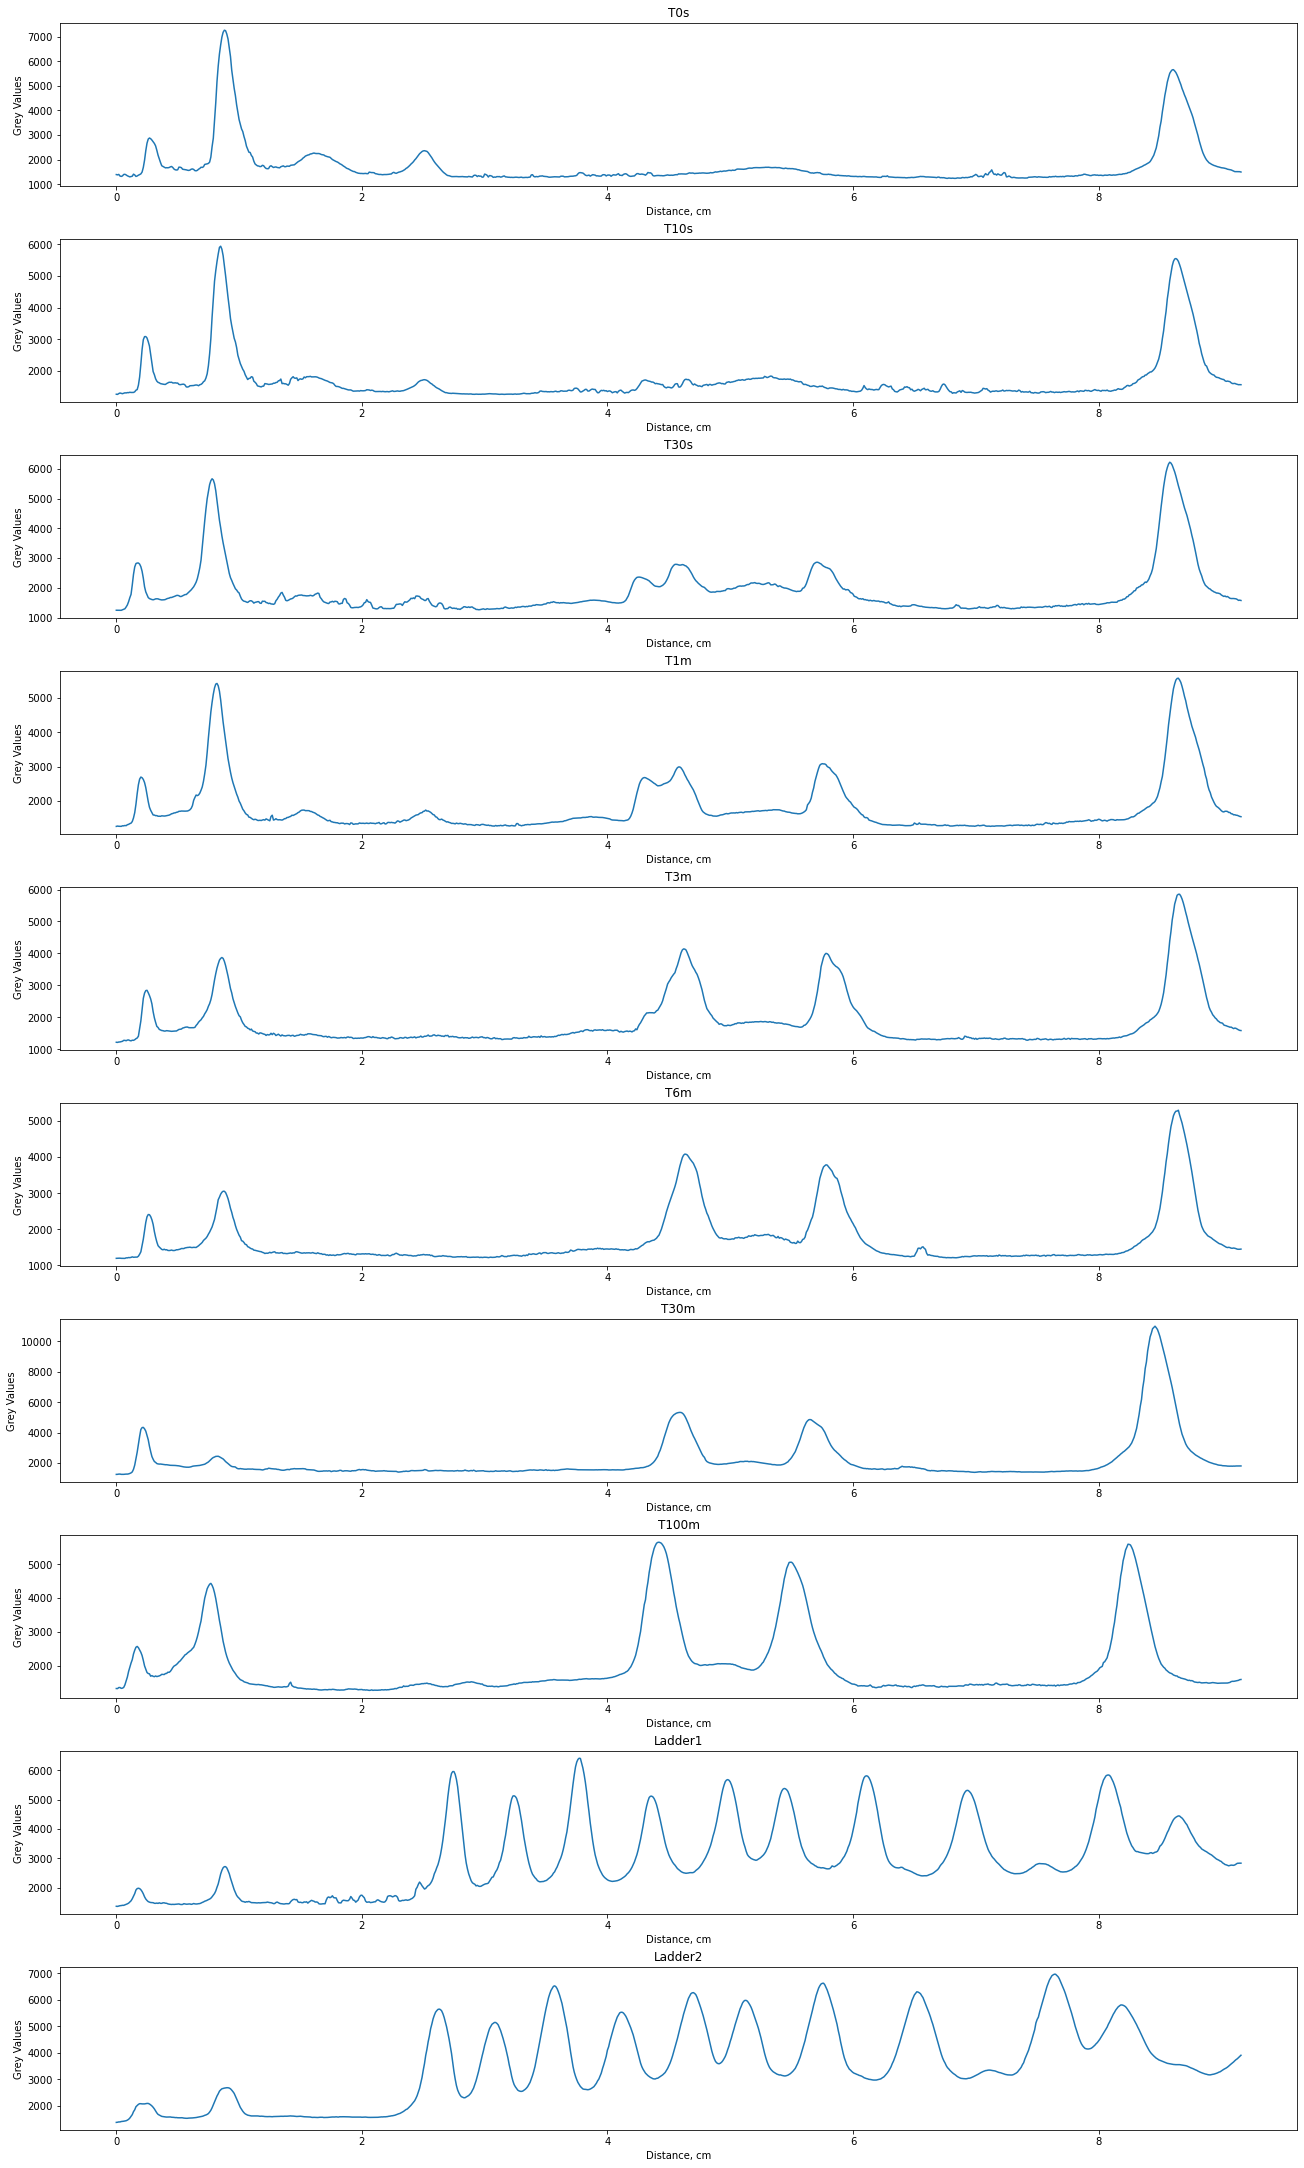

In [30]:
grey_values_list = ["Grey_Values_T0", "Grey_Values_T10s", "Grey_Values_T30s", "Grey_Values_T1M", "Grey_Values_T3M", "Grey_Values_T6M",
                   "Grey_Values_T30M", "Grey_Values_T100M", "Grey_Values_Ladder1", "Grey_Values_Ladder2"] #sąrašas naudojamas grafikams piešti

figure, axis = plt.subplots(nrows=10, figsize=(18, 30), constrained_layout=True)

for di, d in enumerate(grey_values_list):
    name_list = ["T0s", "T10s", "T30s", "T1m", "T3m", "T6m", "T30m", "T100m", "Ladder1", "Ladder2"]
    axis[di].plot(data["Distance"], data[d])
    axis[di].set_title(str(name_list[di])) 
    axis[di].set(xlabel="Distance, cm", ylabel="Grey Values")

4. Removing the backgroud (adjusting the baseline).

In [31]:
for d in data:
    for l in grey_values_list:
        if d == l:
            baseline_fitter = Baseline(x_data=data["Distance"])
            imodpoly = baseline_fitter.imodpoly(data[d], poly_order=3, num_std=0.8) #gali pakeisti num_std, pamatysi kaip keičiasi kreivės
            new_y = data[d]-imodpoly[0]
            data[d+"_baseline"] = new_y
       

In [32]:
grey_values_baseline_adj_list = []

for d in grey_values_list:
    d = d+"_baseline"
    grey_values_baseline_adj_list.append(d)

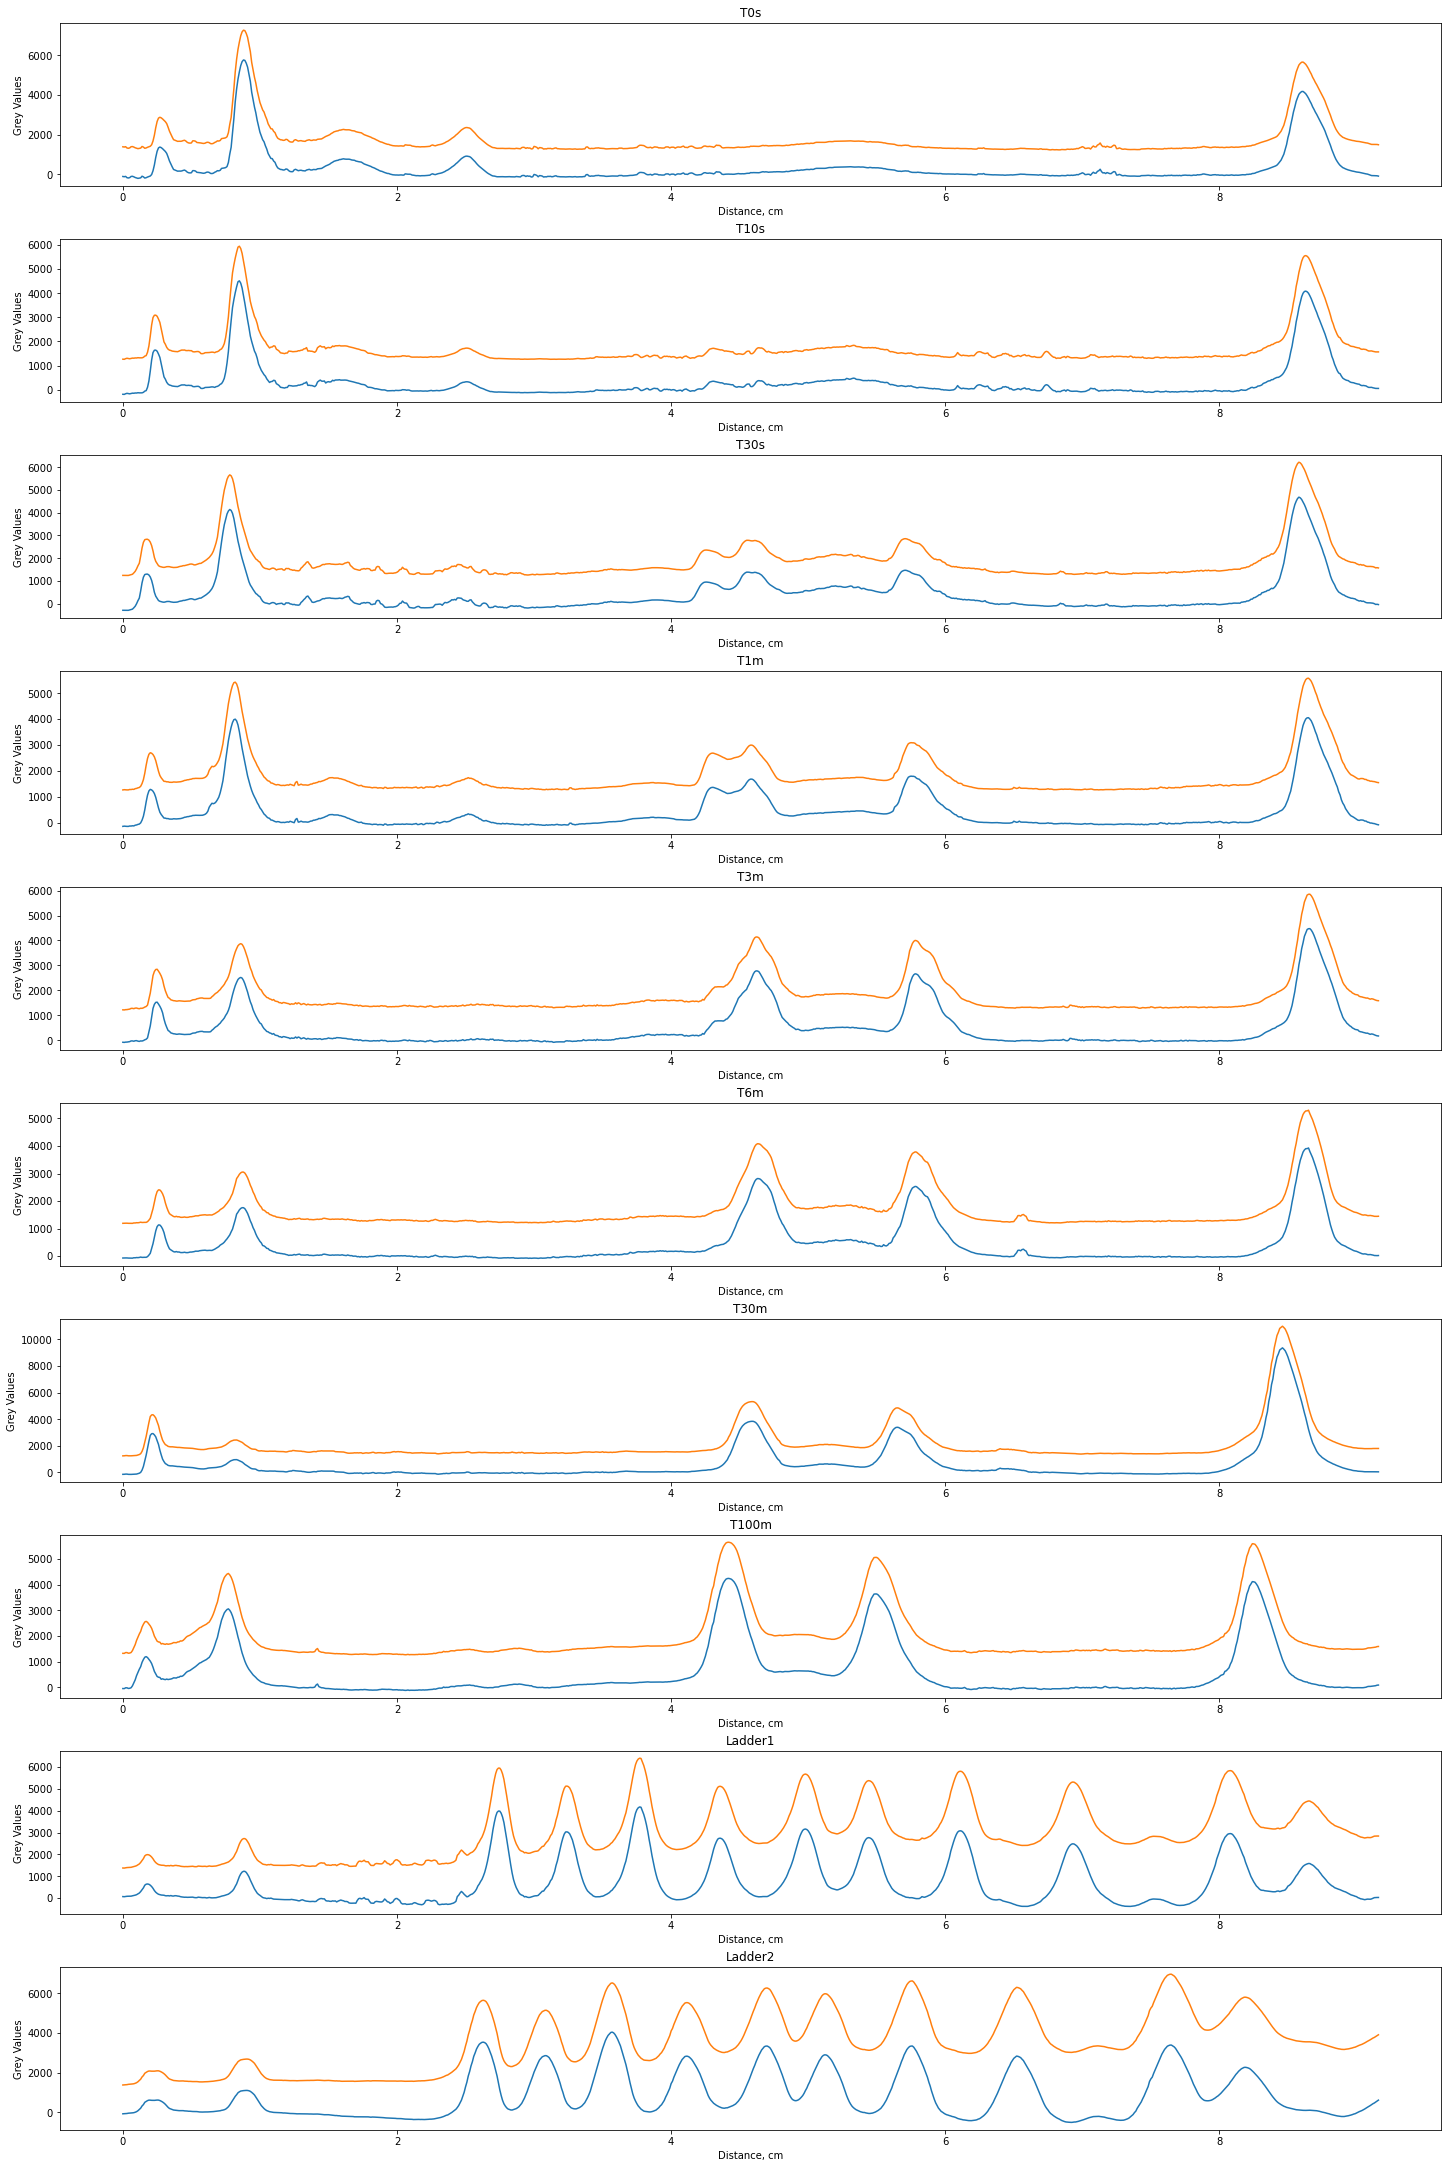

In [33]:
# Plotting the data with adjusted baseline and initial data

figure, axis = plt.subplots(nrows=10, figsize=(20, 30), constrained_layout=True)

for di, d in enumerate(grey_values_baseline_adj_list):
    name_list = ["T0s", "T10s", "T30s", "T1m", "T3m", "T6m", "T30m", "T100m", "Ladder1", "Ladder2"]
    axis[di].plot(data["Distance"], data[d])
    axis[di].plot(data["Distance"], data[grey_values_list[di]])
    axis[di].set_title(str(name_list[di])) 
    axis[di].set(xlabel="Distance, cm", ylabel="Grey Values")

5. Normalizing the distance in each lane.

In [34]:
#Finding peak values:

peaks_list = []

for di, d in enumerate(grey_values_baseline_adj_list):
    peaks, values = find_peaks(data[d], height=500)
    peak_values = data.iloc[peaks, 0]
    peak_values = list(peak_values)
    peak_data = (peak_values)
    peaks_list.append(peak_data)
    print(peak_data) #visi peaks


[0.27, 0.88, 1.61, 1.64, 2.51, 8.61]
[0.24, 0.85, 8.63]
[0.18, 0.78, 4.26, 4.56, 4.61, 4.95, 4.98, 5.08, 5.14, 5.17, 5.2, 5.23, 5.31, 5.36, 5.4, 5.71, 5.93, 5.96, 8.38, 8.58]
[0.2, 0.65, 0.82, 4.3, 4.58, 5.75, 8.65]
[0.25, 0.86, 4.32, 4.34, 4.36, 4.62, 5.18, 5.21, 5.25, 5.28, 5.32, 5.35, 5.78, 8.66]
[0.26, 0.87, 4.63, 4.93, 5.07, 5.09, 5.15, 5.18, 5.2, 5.25, 5.28, 5.31, 5.35, 5.39, 5.41, 5.78, 8.65]
[0.22, 0.83, 4.59, 5.08, 5.12, 5.14, 5.17, 5.19, 5.65, 8.46]
[0.17, 0.77, 4.42, 4.8, 4.83, 4.9, 4.93, 4.96, 5.0, 5.02, 5.49, 8.24]
[0.18, 0.88, 2.74, 3.24, 3.77, 4.36, 4.98, 5.44, 6.11, 6.93, 8.08, 8.65]
[0.19, 0.25, 0.9, 2.63, 3.08, 3.57, 4.11, 4.7, 5.12, 5.76, 6.52, 7.64, 8.19]


In [35]:
min_max_list = []

for i in peaks_list:
    min_peak = i[0]
    max_peak = i[-1]
    min_max = list((min_peak, max_peak))
    min_max_list.append(min_max)
    
min_max_list #Pasiimti pirmą (0) ir paskutinį (-1) peaks'us.

[[0.27, 8.61],
 [0.24, 8.63],
 [0.18, 8.58],
 [0.2, 8.65],
 [0.25, 8.66],
 [0.26, 8.65],
 [0.22, 8.46],
 [0.17, 8.24],
 [0.18, 8.65],
 [0.19, 8.19]]

In [36]:
# Normalizing the distance

norm_list = []
name_list = ["T0s", "T10s", "T30s", "T1m", "T3m", "T6m", "T30m", "T100m", "Ladder1", "Ladder2"]

for i, n in min_max_list:
    norm_distance = ((data["Distance"] - i) / (n - i))
    norm_list.append(norm_distance)

for i, n in enumerate(norm_list):
    data[name_list[i]+"_norm_distance"] = n #Įtraukiama į data lentelę
    
distance_norm_list = []

for n in name_list:
    n = n+"_norm_distance"
    distance_norm_list.append(n) #Grafikų piešimui

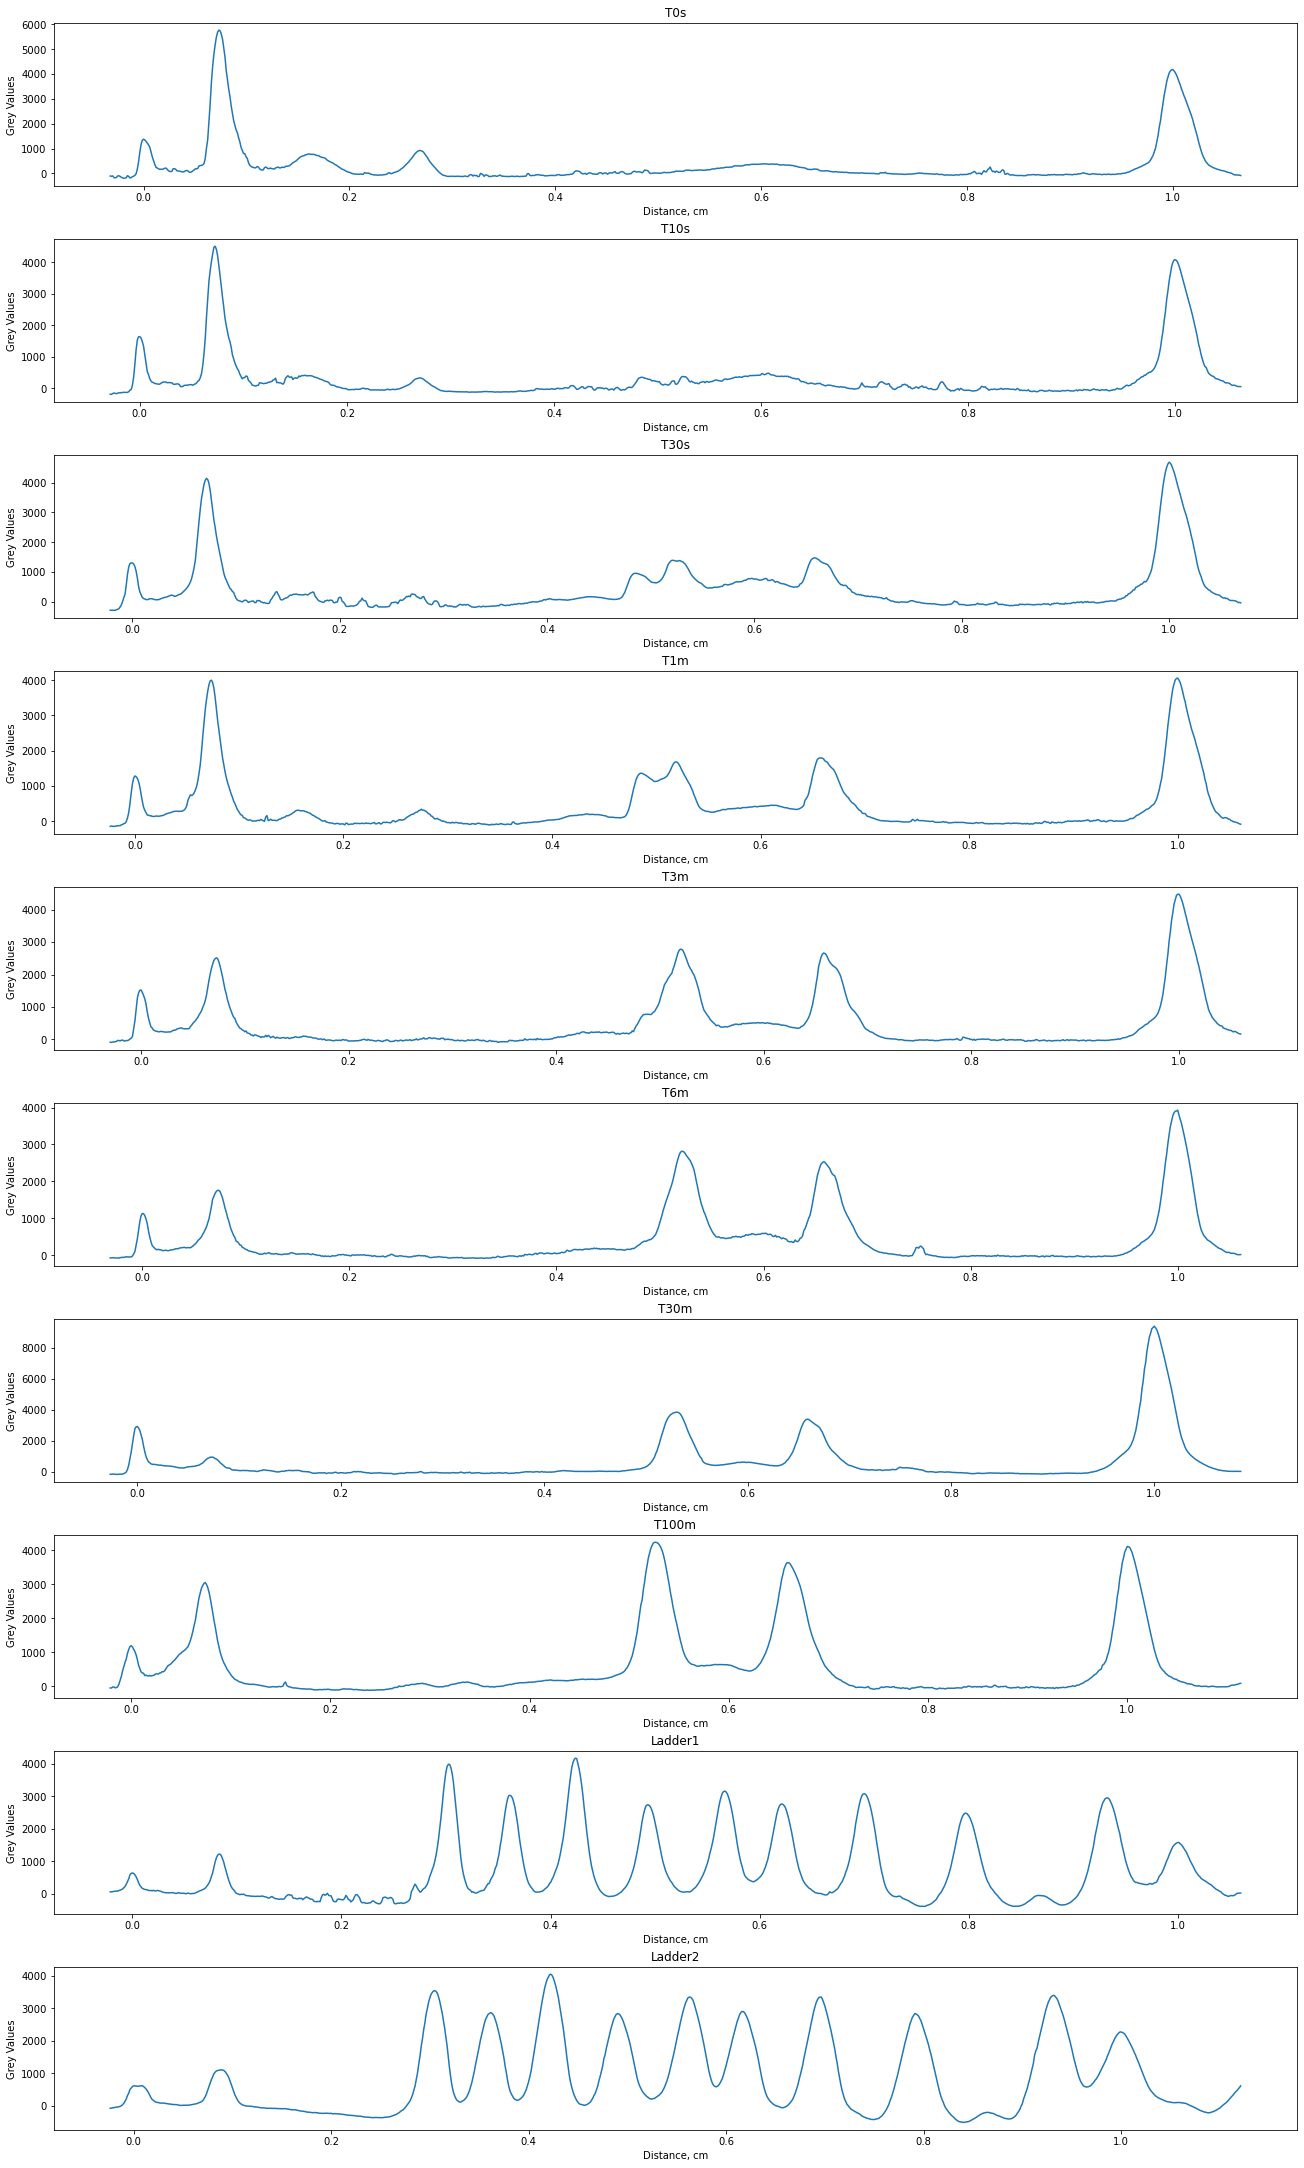

In [37]:
# Plotting the data with normalized distance

figure, axis = plt.subplots(nrows=10, figsize=(18, 30), constrained_layout=True)

for di, d in enumerate(grey_values_baseline_adj_list):
    axis[di].plot(data[distance_norm_list[di]], data[d])
    axis[di].set_title(str(name_list[di])) 
    axis[di].set(xlabel="Distance, cm", ylabel="Grey Values")

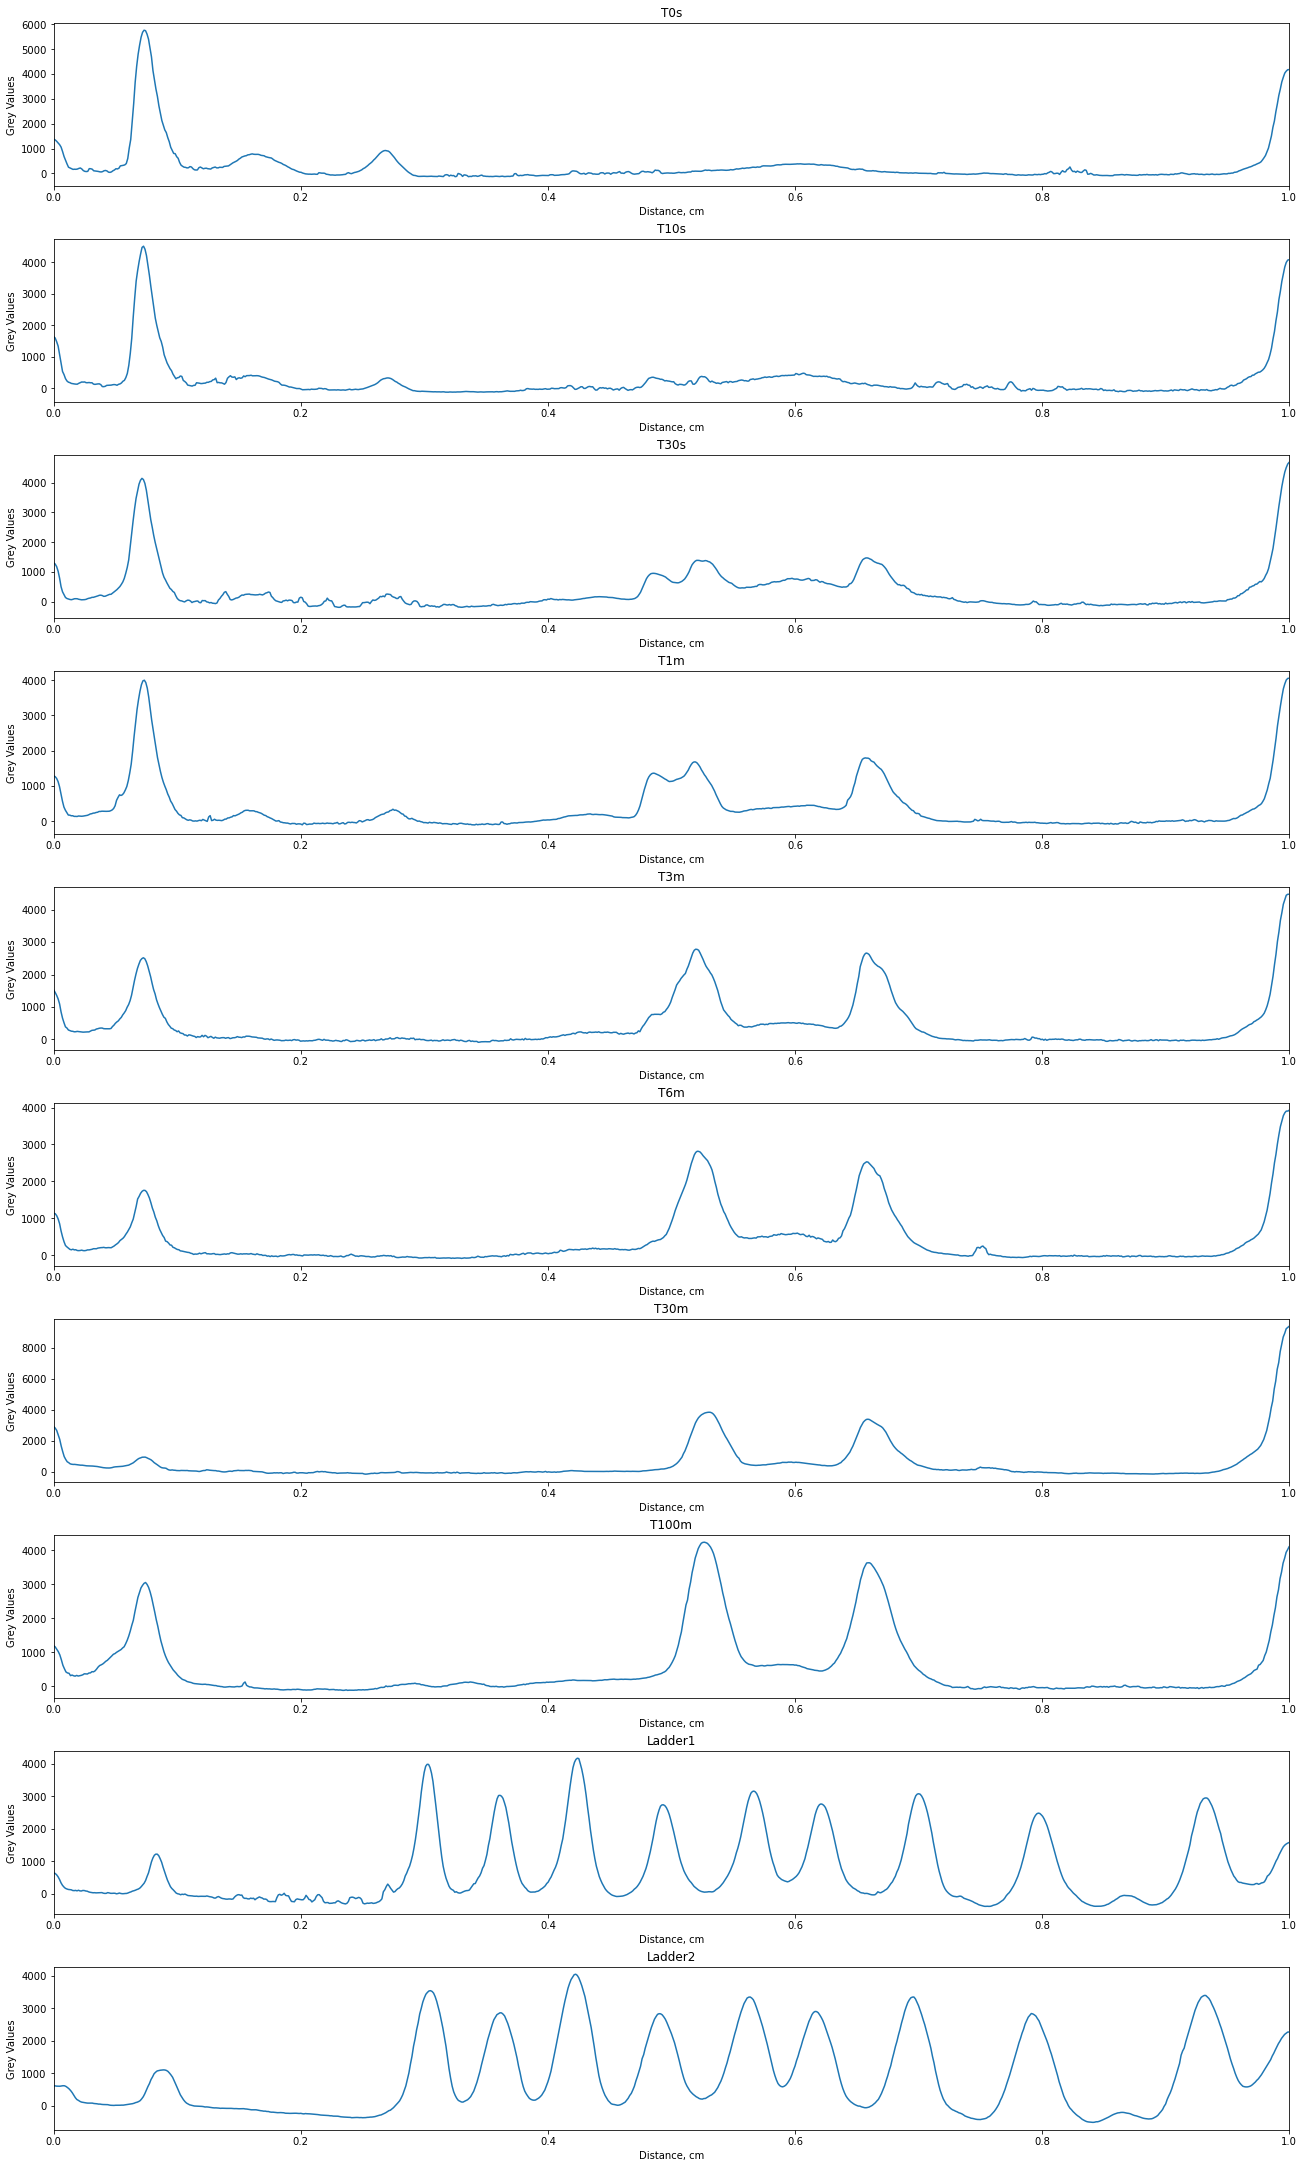

In [38]:
# Plotting the data with normalized distance from 0 to 1

figure, axis = plt.subplots(nrows=10, figsize=(18, 30), constrained_layout=True)

for di, d in enumerate(grey_values_baseline_adj_list):
    axis[di].plot(data[distance_norm_list[di]], data[d])
    axis[di].set_title(str(name_list[di])) 
    axis[di].set_xlim(0, 1)
    axis[di].set(xlabel="Distance, cm", ylabel="Grey Values")